# Taller PRYE 

## Integrantes
Andres Calderon Ramirez
Santiago Hurtado Martinez

## 1.Variables cualitativas:

### Indentifique las variables cuanlitativas o categoricas


In [24]:
import pandas as pd
df = pd.read_csv("lungcap.csv")
cualitativas = df.select_dtypes(include=["object"])
print(cualitativas)

    Gender
0        F
1        F
2        F
3        F
4        F
..     ...
649      M
650      M
651      M
652      M
653      M

[654 rows x 1 columns]


Las variable cualitativas son el genero.

### Identifique todas las variables

In [25]:
variables = df.columns.tolist()
print(variables)


['Age', 'FEV', 'Ht', 'Gender', 'Smoke']


Las variables son la edad, capacidad pulmonar, altura, genero, habitos de tabaquismo

## Elabora un diagrama de barras que represente la cantidad de fumadores y no fumadores en la muestra, siendo 0 no fumadores y 1 fumadores

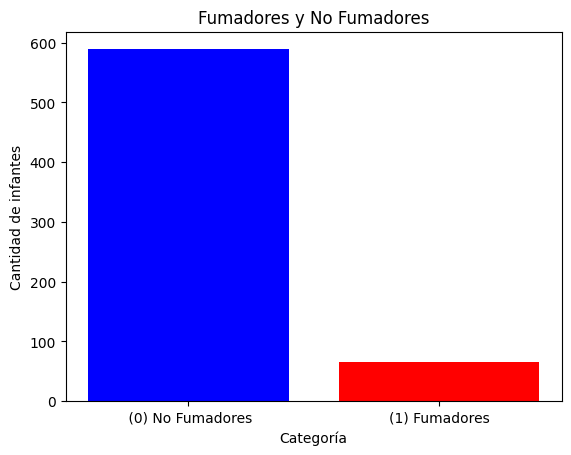

In [26]:
import matplotlib.pyplot as plt

conteo_fumadores = df["Smoke"].value_counts()


categorias = [" (0) No Fumadores", "(1) Fumadores"]
valores = [conteo_fumadores.get(0, 0), conteo_fumadores.get(1, 0)]  


plt.bar(categorias, valores, color=["blue", "red"])
plt.xlabel("Categoría")
plt.ylabel("Cantidad de infantes")
plt.title("Fumadores y No Fumadores")
plt.show()



## Use un diagrama de barras para visualizar la distribucion de genero de la muestra

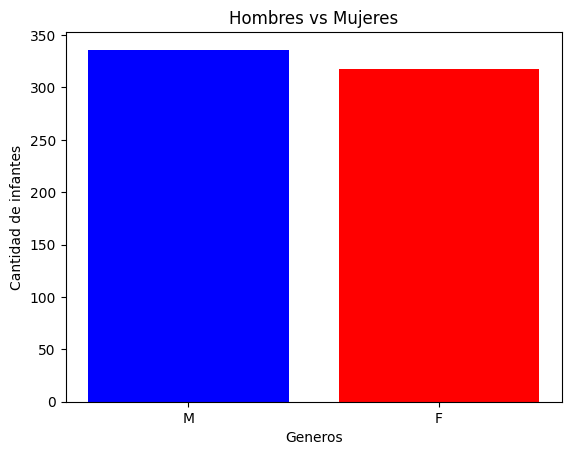

In [27]:
conteo_genero = df["Gender"].value_counts()


categorias = ["M", "F"]
valores = [conteo_genero.get("M", "M"), conteo_genero.get("F", "F")]  


plt.bar(categorias, valores, color=["blue", "red"])
plt.xlabel("Generos")
plt.ylabel("Cantidad de infantes")
plt.title("Hombres vs Mujeres")
plt.show()


## Elabore una tabla de contingencia para resumir la cantidad de fumadores o no, de acuerdo con el sexo

In [28]:
tabla = pd.crosstab(df["Gender"], df["Smoke"])


tabla.index.name = None
tabla.columns.name = None

print(tabla)



     0   1
F  279  39
M  310  26


## Interprete los graficos y tablas obtenidas, identificando visualmente si hay diferencias significativas en la cantidad de fumadores entre hombres y mujeres 
## Cual es la edad minima dentro de los fumadores del estudio. Concluye

In [41]:
fumadoras = tabla.loc["F", 1]


total_mujeres = tabla.loc["F"].sum()

mujeres_fumadoras = (fumadoras/total_mujeres)*100

print("Niñas que fuman:",mujeres_fumadoras.round(3),"%")
print("Total niñas;",total_mujeres)

fumadores = tabla.loc["M",1]

total_hombres = tabla.loc["F"].sum()

hombres_fumadores = (fumadores/total_hombres)*100

print("Niños que fuman:",hombres_fumadores.round(3),"%")
print("Total niños:",total_hombres)


edad_minima = df[df["Smoke"] == 1]["Age"].min()
print("Edad mínima de los fumadores:", edad_minima)

Niñas que fuman: 12.264 %
Total niñas; 318
Niños que fuman: 8.176 %
Total niños: 318
Edad mínima de los fumadores: 9


#### _A simple vista y según la proporsión tomada, pareciera que fumaran más niñas que niños a pesar de evaluar a la misma cantidad de niños como de niñas._

# 2 Variables cuantitativas:

## Elabore diagramas de caja y bigotes (boxplots) para la capacidad pulmonar (FEV) diferenciados por el hábito de fumar. Utilice la variable Smoke para segmentar los datos en fumadores y no fumadores.

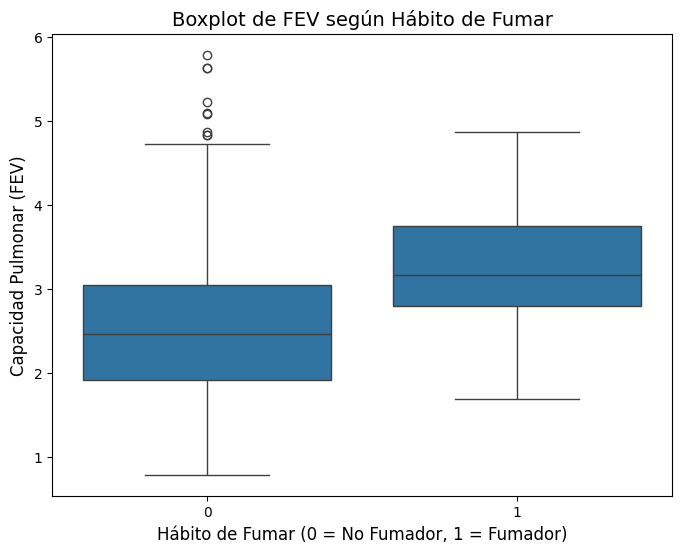

In [49]:
import seaborn as sns


FEV = df["FEV"].tolist()
FEV.sort()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Smoke", y="FEV", data=df)

# Etiquetas y título
plt.xlabel("Hábito de Fumar (0 = No Fumador, 1 = Fumador)", fontsize=12)
plt.ylabel("Capacidad Pulmonar (FEV)", fontsize=12)
plt.title("Boxplot de FEV según Hábito de Fumar", fontsize=14)

# Mostrar el gráfico
plt.show()

## Interprete los diagramas de caja y bigotes obtenidos, analizando si hay diferencias en la capacidad pulmonar entre fumadores y no fumadores. Identifique valores atípicos si los hay.

#### _Los fumadores tienen más capacidad pulmorar según el boxplot_
#### _Sin embargo este resultado puede estar sesgado pues la muestra de fumadores es mucho menor que la muestra de fumadores_
#### _Por otro lado, aparecen más fumadores a medida que los niños crecen, esto implica que sus pulmones crecen y por eso aumenta la capacidad pulmonar con respecto a los más pequeños que no fuman_

## Elabore una tabla que contenga la media de la capacidad pulmonar (FEV) de acuerdo con la edad.

In [52]:
tabla_fev_edad = df.groupby("Age")["FEV"].mean().reset_index()

# Renombrar columnas
tabla_fev_edad.columns = ["Edad", "Media de FEV"]

# Mostrar la tabla
print(tabla_fev_edad)

    Edad  Media de FEV
0      3      1.238000
1      4      1.275889
2      5      1.552286
3      6      1.657973
4      7      1.869444
5      8      2.115306
6      9      2.432170
7     10      2.690136
8     11      3.039344
9     12      3.223439
10    13      3.483256
11    14      3.582240
12    15      3.484842
13    16      3.668923
14    17      4.296500
15    18      3.591833
16    19      3.988667


## Construya un gráfico de dispersión (scatter plot) que relacione la edad (Age) con la capacidad pulmonar (FEV)

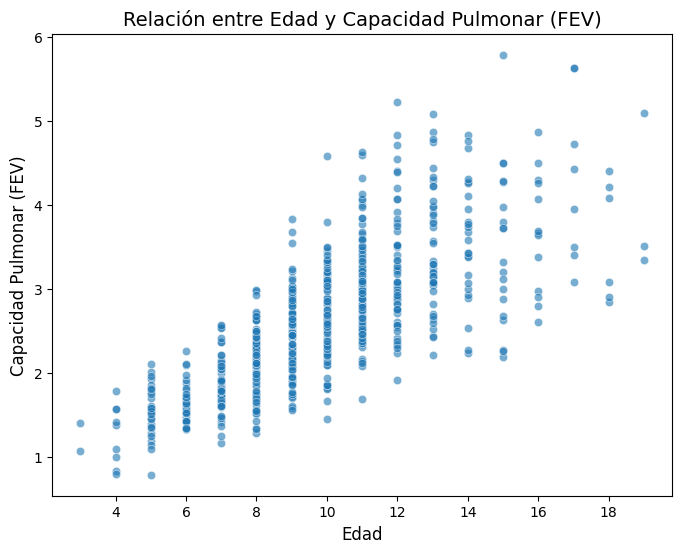

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="FEV", alpha=0.6)

# Etiquetas y título
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Capacidad Pulmonar (FEV)", fontsize=12)
plt.title("Relación entre Edad y Capacidad Pulmonar (FEV)", fontsize=14)

# Mostrar el gráfico
plt.show()

## Analice la relación entre la edad y la capacidad pulmonar, identificando tendencias generales y posibles asociaciones entre ambas variables.


#### _A medida que ños niños crecen, su capacidad pulmonar aumenta siguiento una tendencia más o menos lineal, esto puede ser posible por lo que se dijo en un punto pasado, entre más crezcan más crecen sus pulmones, sin embargo estos llegan a un tamaño fijo y por más que pasen los años, los pulmones no creceran._

## Elabore una tabla que contenga la varianza de la capacidad pulmonar (FEV) de acuerdo a la edad, clasificada por el hábito de fumar (Smoke)

In [65]:
tabla_varianza = df.groupby(['Age', 'Smoke'])['FEV'].var().unstack()
tabla_varianza.fillna("No hay datos", inplace=True)
tabla_varianza.columns.name = 'Fumador'
tabla_varianza.index.name = 'Edad'

print(tabla_varianza)

Fumador             0             1
Edad                               
3            0.055112  No hay datos
4            0.124773  No hay datos
5            0.095091  No hay datos
6            0.049541  No hay datos
7            0.112032  No hay datos
8             0.15322  No hay datos
9            0.228924  No hay datos
10           0.283688      0.194267
11           0.315602      0.551866
12           0.536626      0.381717
13             0.5147        0.6014
14           0.393716      0.951866
15           0.920847      0.587303
16           0.321966       0.73557
17           0.759061      0.052488
18           0.414713      0.050562
19       No hay datos      0.015138


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10880\3934152130.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No hay datos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tabla_varianza.fillna("No hay datos", inplace=True)


## Analice las tablas obtenidas, identificando si la variabilidad y la media de la capacidad pulmonar cambian significativamente con la edad y si hay diferencias entre fumadores y no fumadores.

#### _La capacidad pulmonar aumenta con la edad, lo cual es esperado, ya que el sistema respiratorio se desarrolla con el crecimiento._
#### _Por otro lado observamos un crecimiento casi lineal en FEV desde los 3 hasta los 19 años, alcanzando un valor cercano a 4.0 litros a los 19 años._



#### No fumadores:
#### _La varianza es baja en edades tempranas_
#### _Aumenta significativamente después de los 10 años y sigue aumentando hasta los 17 años._


#### Fumadores:

#### _No hay datos para edades entre 3 y 9 años._
#### _A partir de los 10 años, la varianza en fumadores es generalmente mayor que en los no fumadores._ 
#### _Además, las tablas indican que los fumadores tienen una mayor dispersión en su capacidad pulmonar._



